# THE SIMPLE STRATEGY

The below code will simulate the different strategies in the simple probabilistic environment

In [1]:
from simple_model_evaluation import *

# LOAD THE WANTED FILES

folder_mode = True              # If loading should be done from seperate folder
folder_name = "longest_run"   # The name of the folder

save_mode = False                # If plots should be shown or saved

args = get_args_from_txt(folder_name)

args_generating = {"T": args["T"], "Q": 3, "dp": args["dp"], "phi": args["phi"]}

# Remaining arguments
n_test = 1e6
n_runs = 10
n_train = 1.5e7

# Fetch the names of the tables to be loaded
file_names = args_to_file_names(args, n_runs = n_runs, n = n_train)

In [2]:
# CALCULATE THE MEAN Q-TABLE
Q_mean, Q_tables = calculate_mean_Q(file_names, folder_mode=folder_mode, folder_name=folder_name)

In [3]:
# VALUES FOR MEAN TABLE

env = SimpleEnv(**args, printing=False, debug=False, analytical=False)

Q_tab = Q_mean

Q_t = []
X_t = []
V_t = []

for episode in range(int(n_test)):

    env.reset()
    disc_reward = 0

    q_t = [0]
    x_t = [0]
    v_t = [0]

    while env.t < env.T:
        
        state = env.state()

        action = np.array(np.unravel_index(Q_tab[state].argmax(), Q_tab[state].shape))

        env.step(np.array(action))

        q_t.append(env.Q_t)
        x_t.append(env.X_t)
        v_t.append(env.X_t + env.H_t())

    Q_t.append(q_t)
    X_t.append(x_t)
    V_t.append(v_t)

Q_t_Q_mean = np.mean(Q_t, axis=0)
X_t_Q_mean = np.mean(X_t, axis=0)
V_t_Q_mean = np.mean(V_t, axis=0)


In [4]:
# VALUES FOR BEST RUN

env = SimpleEnv(**args, printing=False, debug=False, analytical=False)

Q_tab = Q_tables[8]

Q_t = []
X_t = []
V_t = []

for episode in range(int(n_test)):

    env.reset()
    disc_reward = 0

    q_t = [0]
    x_t = [0]
    v_t = [0]

    while env.t < env.T:
        
        state = env.state()

        action = np.array(np.unravel_index(Q_tab[state].argmax(), Q_tab[state].shape))

        env.step(np.array(action))

        q_t.append(env.Q_t)
        x_t.append(env.X_t)
        v_t.append(env.X_t + env.H_t())

    Q_t.append(q_t)
    X_t.append(x_t)
    V_t.append(v_t)

Q_t_best = np.mean(Q_t, axis=0)
X_t_best = np.mean(X_t, axis=0)
V_t_best = np.mean(V_t, axis=0)

In [5]:
# VALUES FOR ANALYTICAL CONTINUOUS

env = SimpleEnv(**args, printing=False, debug=False, analytical=True)

data_bid = generate_optimal_depth(**args_generating, bid=True, discrete=False)
data_ask = generate_optimal_depth(**args_generating, bid=False, discrete=False)

Q_t = []
X_t = []
V_t = []

Q = 3

for episode in range(int(n_test)):

    env.reset()
    disc_reward = 0

    q_t = [0]
    x_t = [0]
    v_t = [0]

    while env.t < env.T:
        
        state = env.state()

        action = data_bid[state[0] + Q, env.t], data_ask[state[0] + Q, env.t]

        env.step(np.array(action))

        q_t.append(env.Q_t)
        x_t.append(env.X_t)
        v_t.append(env.X_t + env.H_t())

    Q_t.append(q_t)
    X_t.append(x_t)
    V_t.append(v_t)

Q_t_analytical_cont = np.mean(Q_t, axis=0)
X_t_analytical_cont = np.mean(X_t, axis=0)
V_t_analytical_cont = np.mean(V_t, axis=0)

In [6]:
# VALUES FOR ANALYTICAL DISCRETE

env = SimpleEnv(**args, printing=False, debug=False, analytical=True)

data_bid = generate_optimal_depth(**args_generating, bid=True, discrete=True)
data_ask = generate_optimal_depth(**args_generating, bid=False, discrete=True)

Q_t = []
X_t = []
V_t = []

Q = 3

for episode in range(int(n_test)):

    env.reset()
    disc_reward = 0

    q_t = [0]
    x_t = [0]
    v_t = [0]

    while env.t < env.T:
        
        state = env.state()

        action = data_bid[state[0] + Q, env.t], data_ask[state[0] + Q, env.t]

        env.step(np.array(action))

        q_t.append(env.Q_t)
        x_t.append(env.X_t)
        v_t.append(env.X_t + env.H_t())

    Q_t.append(q_t)
    X_t.append(x_t)
    V_t.append(v_t)

Q_t_analytical_disc = np.mean(Q_t, axis=0)
X_t_analytical_disc = np.mean(X_t, axis=0)
V_t_analytical_disc = np.mean(V_t, axis=0)

In [7]:
# VALUES FOR CONSTANT

env = SimpleEnv(**args, printing=False, debug=False, analytical=False)

Q_t = []
X_t = []
V_t = []

c = 2

for episode in range(int(n_test)):

    env.reset()
    disc_reward = 0

    q_t = [0]
    x_t = [0]
    v_t = [0]

    while env.t < env.T:
        action = np.array([c, c]) - env.min_dp
        
        env.step(np.array(action))

        q_t.append(env.Q_t)
        x_t.append(env.X_t)
        v_t.append(env.X_t + env.H_t())

    Q_t.append(q_t)
    X_t.append(x_t)
    V_t.append(v_t)

Q_t_constant = np.mean(Q_t, axis=0)
X_t_constant = np.mean(X_t, axis=0)
V_t_constant = np.mean(V_t, axis=0)

In [8]:
# VALUES FOR RANDOM

env = SimpleEnv(**args, printing=False, debug=False, analytical=False)

Q_t = []
X_t = []
V_t = []

for episode in range(int(n_test)):

    env.reset()
    disc_reward = 0

    q_t = [0]
    x_t = [0]
    v_t = [0]

    while env.t < env.T:
        action = env.action_space.sample()
        
        env.step(np.array(action))

        q_t.append(env.Q_t)
        x_t.append(env.X_t)
        v_t.append(env.X_t + env.H_t())

    Q_t.append(q_t)
    X_t.append(x_t)
    V_t.append(v_t)

Q_t_random = np.mean(Q_t, axis=0)
X_t_random = np.mean(X_t, axis=0)
V_t_random = np.mean(V_t, axis=0)

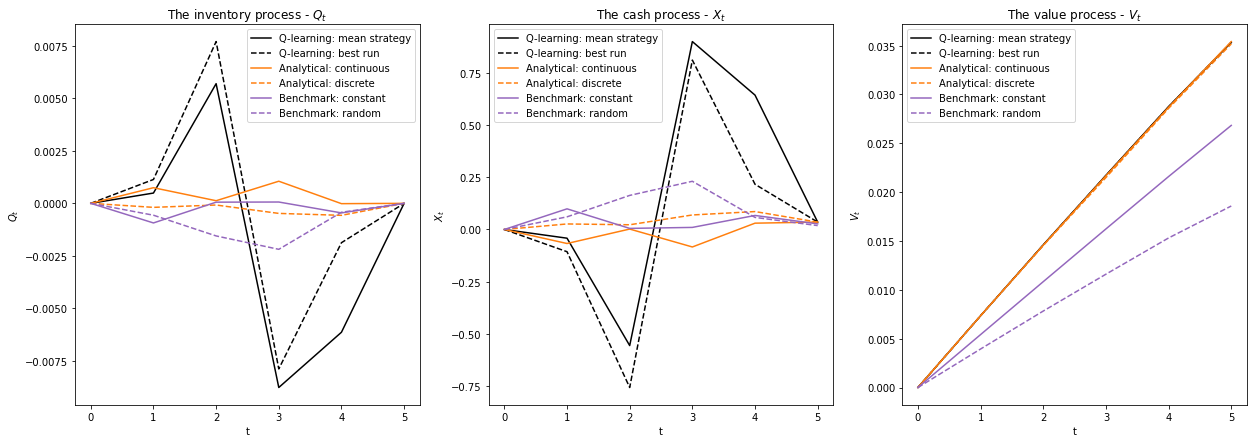

In [9]:
fig, (q_axis, x_axis, v_axis) = plt.subplots(1, 3, figsize=(21, 7))

q_axis.plot(Q_t_Q_mean, linestyle="-", color="k", label="Q-learning: mean strategy")
x_axis.plot(X_t_Q_mean, linestyle="-", color="k", label="Q-learning: mean strategy")
v_axis.plot(V_t_Q_mean, linestyle="-", color="k", label="Q-learning: mean strategy")

q_axis.plot(Q_t_best, linestyle="--", color="k", label="Q-learning: best run")
x_axis.plot(X_t_best, linestyle="--", color="k", label="Q-learning: best run")
v_axis.plot(V_t_best, linestyle="--", color="k", label="Q-learning: best run")

q_axis.plot(Q_t_analytical_cont, linestyle="-", color="C1", label="Analytical: continuous")
x_axis.plot(X_t_analytical_cont, linestyle="-", color="C1", label="Analytical: continuous")
v_axis.plot(V_t_analytical_cont, linestyle="-", color="C1", label="Analytical: continuous")

q_axis.plot(Q_t_analytical_disc, linestyle="--", color="C1", label="Analytical: discrete")
x_axis.plot(X_t_analytical_disc, linestyle="--", color="C1", label="Analytical: discrete")
v_axis.plot(V_t_analytical_disc, linestyle="--", color="C1", label="Analytical: discrete")

q_axis.plot(Q_t_constant, linestyle="-", color="C4", label="Benchmark: constant")
x_axis.plot(X_t_constant, linestyle="-", color="C4", label="Benchmark: constant")
v_axis.plot(V_t_constant, linestyle="-", color="C4", label="Benchmark: constant")

q_axis.plot(Q_t_random, linestyle="--", color="C4", label="Benchmark: random")
x_axis.plot(X_t_random, linestyle="--", color="C4", label="Benchmark: random")
v_axis.plot(V_t_random, linestyle="--", color="C4", label="Benchmark: random")

q_axis.set_title("The inventory process - $Q_t$")
x_axis.set_title("The cash process - $X_t$")
v_axis.set_title("The value process - $V_t$")

q_axis.set_xlabel("t")
q_axis.set_ylabel("$Q_t$")
q_axis.get_yaxis().get_major_formatter().set_useOffset(False)

x_axis.set_xlabel("t")
x_axis.set_ylabel("$X_t$")
x_axis.get_yaxis().get_major_formatter().set_useOffset(False)

v_axis.set_xlabel("t")
v_axis.set_ylabel("$V_t$")
v_axis.get_yaxis().get_major_formatter().set_useOffset(False)

ticks = [i for i in range(0, Q_t_Q_mean.shape[0])]

q_axis.set_xticks(ticks)
x_axis.set_xticks(ticks)
v_axis.set_xticks(ticks)

q_axis.legend()
x_axis.legend()
v_axis.legend()

plt.show()

UPDATED!